In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

# <span style="color:red">ch04 머신러닝 모형 최적화 </span>

# 1절. 변수 선택과 차원 축소

## 1.1 변수선택과 차원축소

- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
- 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, 분류모형의 feature_importance_, 예측 모형의 coef_
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택

## 1.2 주성분분석(PCA, Principal Component Anaysis)

- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 분산이 극대화된 상관관계가 없는 새로운 변수(주성분)들로 축약하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [4]:
import seaborn as sns
from sklearn.decomposition import PCA

iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
pca = PCA(n_components = 2) # n_components = 2 : 주성분의 개수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [6]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치

pca.components_
# 주성분 1 = 0.36138659 * x1 -0.08452251 * x2 + 0.85667061 * x3 + 0.3582892 * x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [7]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지(설명하는지)

pca.explained_variance_

array([4.22824171, 0.24267075])

In [8]:
# 설명분산을 0 ~ 1 사이의 비율로 조정된 설명정도 : 주성분 결과 특성은 97.76852%

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1.3 상관관계 확인

- 각변수들끼리의 상관관계 확인(시각화), 종속변수와 상관관계가 높은 변수들만 선택

In [9]:
import pandas as pd

#redwine = pd.read_csv('data/winequality-red.csv', delimiter=';')
redwine = pd.read_csv('data/winequality-red.csv', sep = ';')
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.9983,3.45,0.78,9.5,6


In [10]:
corr = redwine.corr()
# 상관관계 결과를 시각화(heatmap)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# cmap의 종류 : https://jrc-park.tistory.com/155 
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap 
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

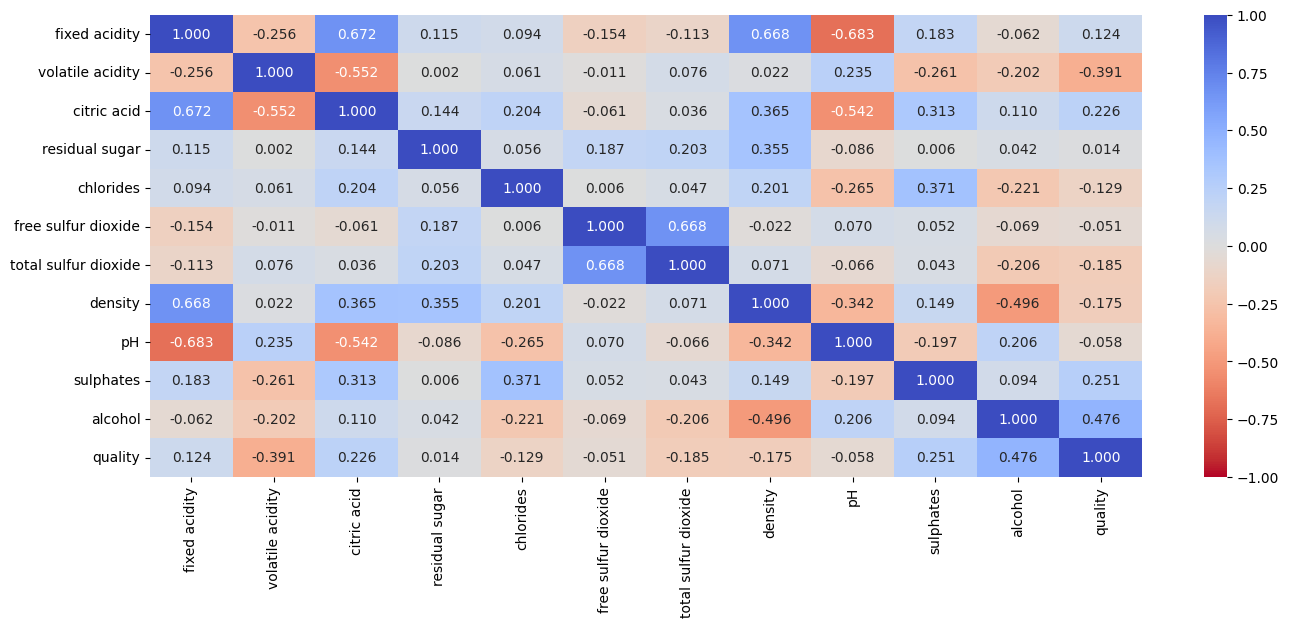

In [12]:
plt.figure(figsize = (16, 6))
sns.heatmap(corr, annot = True, fmt = '.3f', vmin = -1, vmax = 1, cmap = 'coolwarm_r')
plt.show()

In [13]:
np.triu(np.ones_like(corr), k = 0)  # 대각선 포함 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k = 1)  # 대각선 제외 위가 1인 삼각행렬
np.tril(np.ones_like(corr), k = 0)  # 대각선 포함 아래가 1인 삼각행렬
np.tril(np.ones_like(corr), k = -1)  # 대각선 제외 아래가 1인 삼각행렬

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

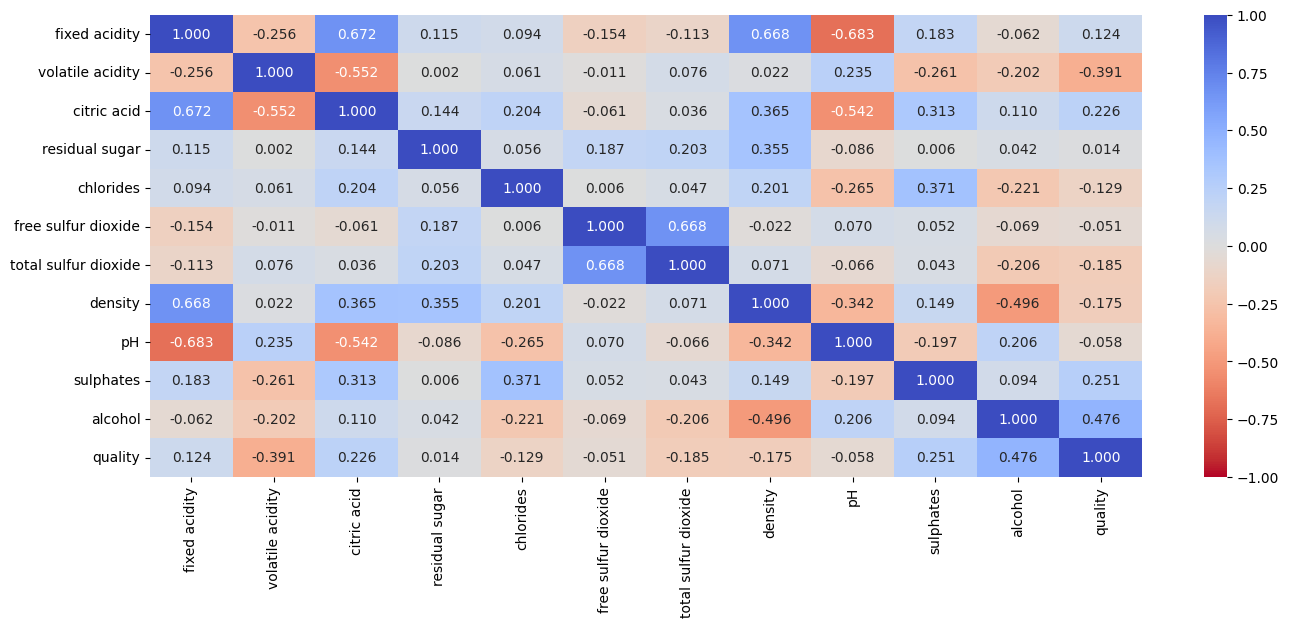

In [14]:
plt.figure(figsize = (16, 6))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, fmt = '.3f', vmin = -1, vmax = 1, cmap = 'coolwarm_r')
plt.show()

## 1.4 분류모형의 Feature importance

- 분류모형의 feature_importance_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussianNB 등은 feature_importance_가 없음
- 그 외 분류모형은 사용가능

In [15]:
from sklearn.model_selection import train_test_split

X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size = 0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10,  # 트리 개수 10개
                                  random_state = 10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [17]:
rf_model.feature_importances_

array([0.08056765, 0.08104112, 0.07148984, 0.06149768, 0.09077255,
       0.06338382, 0.11039838, 0.08657703, 0.07015917, 0.11368025,
       0.17043251])

In [18]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                        columns = ['feature', 'importance']
                       )
features['importance'].sum()

1.0

In [19]:
features.sort_values(by = 'importance', ascending = False, inplace = True)
features.reset_index(drop = True, inplace = True)
features.head()

,feature,importance
0,alcohol,0.170433
1,sulphates,0.11368
2,total sulfur dioxide,0.110398
3,chlorides,0.090773
4,density,0.086577


### feature_importance_를 이용한 변수 중요도 시각화

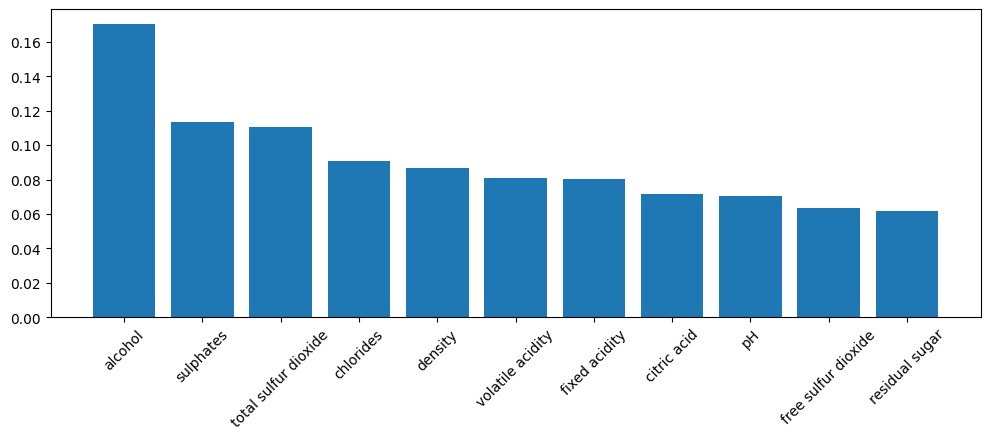

In [20]:
plt.figure(figsize = (12, 4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

In [21]:
# features.importance 누적합
# l = [1, 2, 3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.17043250566404675, 0.17043250566404675],
       [0.11368025286588564, 0.2841127585299324],
       [0.11039838023128967, 0.39451113876122207],
       [0.09077254743737422, 0.4852836861985963],
       [0.08657703016593542, 0.5718607163645317],
       [0.08104111790655243, 0.6529018342710842],
       [0.08056765027913827, 0.7334694845502224],
       [0.07148984420899418, 0.8049593287592166],
       [0.07015917054281288, 0.8751184993020295],
       [0.06338382023085863, 0.9385023195328881],
       [0.06149768046711201, 1.0]], dtype=object)

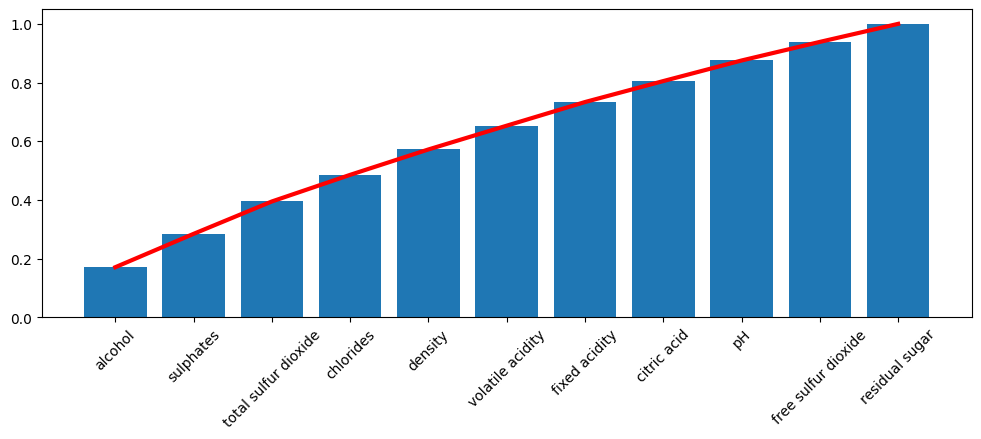

In [22]:
# 누적합을 이용하여 시각화
plt.figure(figsize = (12, 4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color = 'red', lw = 3)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

### RFE(Recursive Feature Elimination) 방식

- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 가면서 최종 선택된 변수 개수만큼 중요도가 높은 변수를 찾는다

In [23]:
# 5개 특징이 남을 때까지 변수를 제거 (기준 : feature_importances_)

from sklearn.feature_selection import RFE

rfe = RFE(rf_model,
         n_features_to_select = 5)
rfe.fit(train_X, train_y)
rfe.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [24]:
features_rfe = pd.DataFrame(np.c_[X.columns, rfe.get_support()],
                            columns = ['feature', 'selected'])
features_rfe[features_rfe.selected == True]

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True


## 1.5 SelectKBest

- 가장 높은 score에 따라 k개 feature 선택

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [26]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [27]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형. x는 연속형
# chi2 :  y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...

X_new = SelectKBest(f_classif,  # x가 연속형
                   k = 1  # 추출될 feature 개수
                   ).fit_transform(X, y)
X_new[:3]  # petal_length

array([[1.4],
       [1.4],
       [1.3]])

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 파라미터 선택

- 하이퍼파라미터(사용자가 직접 설정할 수 있는 파라미터). 최적의 결과를 내는 하이퍼파라미터값?
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클래스 (가장 높은 socre를 내는 모형까지 찾아줌)

## 2.1 validation_curve()

- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [29]:
# 데이터

from sklearn.datasets import load_digits

digits = load_digits()
# digits.data : (1797, 64) 배열 (독립변수)
# digits.images : (1797, 8, 8) 배열
# digits.target : 1797 열 배열 (타겟변수)
# digits.target_names : 타겟변수 내용
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [30]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
np.all(X[0].reshape(8, 8) == digits.images[0])

True

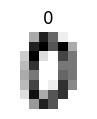

In [34]:
plt.figure(figsize = (1, 1))
plt.imshow(X[0].reshape(8, 8), cmap = 'gray_r')
plt.title(y[0])
plt.axis('off')
plt.show()

In [35]:
from sklearn.svm import SVC

model = SVC(probability = True)  # probability = True : 판별모형이라도 proba가능
model.fit(X, y)

SVC(probability=True)

In [36]:
# 예측값

model.predict(X[0].reshape(1, -1))

array([0])

In [37]:
# 예측확률

print(model.classes_)
print(model.predict_proba(X[0].reshape(1, -1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91496822e-01 2.05697256e-04 4.35637876e-04 7.91989859e-04
  5.84313099e-04 1.40364252e-03 7.12575567e-04 8.58322351e-04
  7.27968979e-04 2.78303060e-03]]


In [38]:
for c, p in zip(model.classes_,
               model.predict_proba(X[0].reshape(1, -1))[0]) :
    print("{}일 확률 : {:.3f}".format(c, p))

0일 확률 : 0.991
1일 확률 : 0.000
2일 확률 : 0.000
3일 확률 : 0.001
4일 확률 : 0.001
5일 확률 : 0.001
6일 확률 : 0.001
7일 확률 : 0.001
8일 확률 : 0.001
9일 확률 : 0.003


In [39]:
model.score(X, y)

0.996661101836394

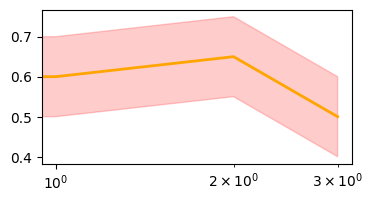

In [40]:
import matplotlib.pyplot as plt
import numpy as np

range = np.array([0, 1, 2, 3])
score = np.array([0.5, 0.6, 0.65, 0.5])
plt.figure(figsize = (4, 2))
plt.semilogx(range, score, color = 'orange', lw = 2)
plt.fill_between(range, score - 0.1, score + 0.1, color = 'red', alpha = 0.2)
plt.show()

In [41]:
# SVC() 모형에서 C 파라미터 값을 다음의 범위 중 제일 좋은 C값?
# 10의 -6승부터 10의 -1승까지 로그간격으로 균등분포 10개를 추출

param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [42]:
%%time

from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(
    SVC(),  # 예측모형
    X, y,
    param_name = "gamma",
    param_range = param_range,  # list로 파라미터 전달
    cv = 10,  # 교차검증 : 데이터 10개중 1개씩 test 데이터로 검증하고 평균 score
    scoring = "accuracy",
    n_jobs = -1  # 시스템의 모든 core 사용
)

CPU times: total: 406 ms
Wall time: 18.4 s


In [43]:
test_score.shape, train_score.shape

((10, 10), (10, 10))

In [44]:
train_score_mean = np.mean(train_score, axis = 1)  # 행별 평균
test_score_mean = np.mean(test_score, axis = 1)
train_score_std = np.std(train_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

In [45]:
train_score_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [46]:
test_score_mean

array([0.13871508, 0.70395717, 0.90871198, 0.94264742, 0.95880509,
       0.97495655, 0.97496586, 0.80522036, 0.19709497, 0.10463687])

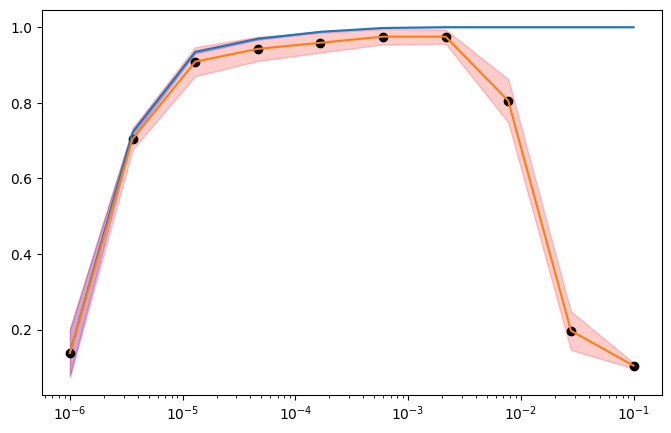

In [48]:
plt.figure(figsize = (8, 5))
plt.semilogx(param_range, train_score_mean)
plt.fill_between(param_range, train_score_mean-train_score_std,
                train_score_mean + train_score_std,
                alpha = 0.2,
                color = 'blue')
plt.semilogx(param_range, test_score_mean)
plt.fill_between(param_range, test_score_mean-test_score_std,
                test_score_mean + test_score_std,
                alpha = 0.2,
                color = 'red')
plt.scatter(param_range, test_score_mean, c = 'k')
plt.show()

In [49]:
test_score_mean.argmax()

6

In [50]:
# 최적의 gammar값

gamma = param_range[6]
gamma

0.0021544346900318843

In [51]:
model = SVC(gamma=gamma).fit(X, y)

In [52]:
model.score(X, y)

1.0

## 2.2 GridSearchCV

- 복수개의 하이퍼 파라미터 최적화 클래스
- 모형도 가지고 옴
- fit(), score(), predict(), predict_proba(), decision_funcion()

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

# 데이터
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep = ';')
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [54]:
%%time

# SelectKBest로 최적의 독립변수 k개 찾음 → SVC()에서 최적의 C값을 찾음
selection = SelectKBest(k = 1)  # 가장 평가 점수가 높은 k개 찾음
svc = SVC(kernel = 'linear')  # 직선으로 나누는 가장 단순한 분류모형
pipeline = Pipeline([('select', selection), ('svc', svc)])
param_grid = dict(select__k = [4, 5, 6, 7, 8, 9, 10, 11],
        svc__C = [0.1, 1, 10]  # 오차 범위 허용 정도(큰C : 엄격, 작은C : 허용범위 큼)
)
grid_search = GridSearchCV(
                pipeline,
                param_grid = param_grid,  # 파라미터들
                cv = 2,
                verbose = 2,  # 로그 출력의 수다스러운 정도
                n_jobs = -1
)
grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 19.5 s
Wall time: 2min 43s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [55]:
# 최적의 파라미터값

grid_search.best_params_

{'select__k': 9, 'svc__C': 1}

In [56]:
# 최적의 모형

model = grid_search.best_estimator_
model.score(redwine_X.values, redwine_y.values)

0.5878674171357098

In [57]:
model = SVC().fit(redwine_X.values, redwine_y.values)
model.score(redwine_X.values, redwine_y.values)

0.5103189493433395

# 3절. 자료 불균형 처리

- 단순 언더/오버 샘플링
- 단, 단순 오버샘플링시 소수의 데이터를 복사하면, 과적합 우려
- 오버샘플링하는 방법 : SMOTE

## 3.1 SMOTE를 이용한 오버샘플링 전

In [58]:
# 데이터

from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000,
                          n_features = 10,  # 독립변수 개수
                          n_informative = 5,  # 타겟변수에 영향을 미치는 독립변수
                          n_redundant = 0,
                          n_clusters_per_class = 1,
                          n_classes = 2,
                          weights=[0.99, 0.01],  # 각 클래스에 할당된 표본 
                          random_state = 42)
y.mean()

0.014

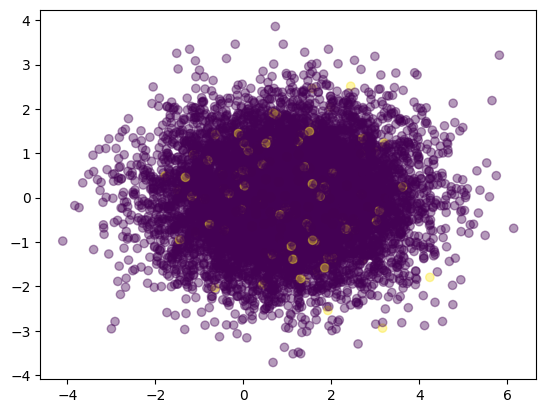

In [59]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.4)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   stratify = y,
                                                   random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100,
                                 max_features = 2,
                                 random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [62]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [63]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3.2 SMOTE를 이용한 전체 오버샘플링 후 데이터 셋 분리

- imbalanced-learn 라이브러리 install

In [64]:
# 0그룹과 1그룹의 개수

df = pd.DataFrame(np.c_[X, y])
df.iloc[:, -1].value_counts()

0.0    9860
1.0     140
Name: 10, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE() # 0그룹 : 1그룹 = 1:1
# sm = SMOTE(sampling_strategy = {0:9860, 1:420})
X_resampled, y_resample = sm.fit_resample(X, y)
X_resampled.shape, y_resample.shape

((19720, 10), (19720,))

In [66]:
# 0그룹과 1그룹의 개수

df = pd.DataFrame(np.c_[X_resampled, y_resample])
df.iloc[:, -1].value_counts()

0.0    9860
1.0    9860
Name: 10, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resample,
                                                   test_size = 0.3,
                                                   stratify = y_resample,
                                                   random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100,
                                 max_features = 2,
                                 random_state = 42)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[2947,   11],
       [  38, 2920]], dtype=int64)

In [68]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.99      0.99      2958

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



## 3.3 가중치 제어

- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형에서 class_weigh 매개변수 설정

In [69]:
rf_model = RandomForestClassifier(n_estimators = 100,
                     max_features = 2, 
                     class_weight = {0:1, 1:1.4},  # 1그룹을 1.4배 더 중요하게
                     random_state = 42
                     )
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

# 4절. 앙상블 모형

- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성을 달성
- 방법 :
    - 하나의 메타 분류 알고리즘 이용 : 배깅(bagging), 부스팅(boosting)
    - 여러 분류 알고리즘을 이용 : 다수결투표
- 배깅 vs 부스팅
    - 배깅
        - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
        - 과적합 줄일 수 있음
        - 데이터가 충분하고 과적합을 방지하면서 안정적인 모델이 필요할 때
        - RandomForestClassifier, BagginClassifier
    - 부스팅
        - 순차적으로 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
        - 오답에 가중치를 둠 (오답에 더 집중)
        - 성능 극대화
        - 성능 극대화해야 하는데, 데이터가 비교적 적거나 복잡한 패턴의 학습을 해야할 경우

## 4.1 배깅알고리즘

In [70]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
X = wine_df.iloc[:, 1:]
y = wine_df['Class label']
X.shape, y.shape

((178, 13), (178,))

In [72]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   stratify = y,
                                                   random_state = 1)

In [74]:
# 의사결정나무 알고리즘

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.9074074074074074

In [75]:
# 배깅알고리즘

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(estimator = tree_model,
                 n_estimators = 500,
                 bootstrap = True,  # 복원추출을 허용
                 bootstrap_features = False,  # 모든 feature 사용해서 학습
                 random_state = 1)
bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.9629629629629629

In [76]:
# 랜덤포레스트알고리즘

rf_model = RandomForestClassifier().fit(train_X, train_y)
rf_model.score(test_X, test_y)

1.0

### 배깅알고리즘시 0.632규칙

In [77]:
np.random.choice(10, 10, replace = True)  # 10개 데이터를 10개 복원추출 뽑기

array([5, 2, 6, 3, 4, 9, 8, 1, 6, 3])

In [78]:
len(set(np.random.choice(10000, 10000, replace = True)))

6319

In [79]:
N = 10000000
len(set(np.random.choice(N, N))) / N

0.632041

## 4.2 임의의 데이터를 만들어 최적 모형 탐색

In [80]:
X, y = make_classification(n_samples = 1000,
                          n_features = 10,
                          n_informative = 5,
                          n_redundant = 0,
                          n_classes = 2,
                          n_clusters_per_class = 1,
                          weights = [0.9, 0.1],  # 0그룹인 90%, 1그룹 10%
                          random_state = 42)

In [81]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   stratify = y, 
                                                   random_state = 42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape, test_X.shape, test_y.shape

((1246, 10), (1246,), (300, 10), (300,))

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

def model_measure(model, train_X = resampled_X, train_y = resampled_y,
                 test_X = test_X, test_y = test_y) :
    '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X)  # 모델 예측값
    accuracy = model.score(test_X, test_y)
    precision = precision_score(test_y, y_hat)
    recall = recall_score(test_y, y_hat)
    f1score = f1_score(test_y, y_hat)
    return "정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1 :{:.3f}".format(
            accuracy, precision, recall, f1score
    )

In [83]:
model_measure(RandomForestClassifier(n_estimators = 100,
                                    max_features = 2,
                                    random_state = 42))

'정확도:0.953, 정밀도:0.852, 재현율:0.697, f1 :0.767'

In [84]:
model_measure(SVC(random_state = 42))

'정확도:0.970, 정밀도:0.929, 재현율:0.788, f1 :0.852'

## 4.3 부스팅 알고리즘

- Adaboost, XGB, LGBM, CatBoost

In [85]:
from sklearn.ensemble import AdaBoostClassifier

model_measure(AdaBoostClassifier())

'정확도:0.927, 정밀도:0.667, 재현율:0.667, f1 :0.667'

In [86]:
# pip install --dray-run xgboost=1.7.3후 설치

from xgboost import XGBClassifier 

model_measure(XGBClassifier(max_depth = 10,  # tree 최대 깊이
                           n_estimators = 100,  # 나무 갯수
                           learning_rate = 0.01))  #학습율

'정확도:0.923, 정밀도:0.632, 재현율:0.727, f1 :0.676'

In [87]:
from lightgbm import LGBMClassifier  # pip install lightgbm

model_measure(LGBMClassifier(force_col_wise = True))

[LightGBM] [Info] Number of positive: 623, number of negative: 623
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1246, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


'정확도:0.957, 정밀도:0.812, 재현율:0.788, f1 :0.800'

## 4.4 투표를 이용한 앙상블

- voting = 'hard' : 다수결로 투표
- voting = 'soft' : 확률의 합을 계산한 투표

In [88]:
X, y = make_classification(n_samples = 200,
                          n_features = 2,
                          n_informative = 2,
                          n_redundant = 0,
                          n_classes = 2,
                          n_clusters_per_class = 1,
                          random_state = 42)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   stratify = y, 
                                                   random_state = 42)

In [89]:
tf_model = RandomForestClassifier(max_features = 2, random_state = 42)
xgb_model = XGBClassifier(max_depth = 10,
                         n_estimators = 100,
                         learning_rate = 0.01,  # 0.01 ~ 0.2
                         eval_metric = "logloss")
lgb_model = LGBMClassifier(n_estimators = 100, force_col_wise = True, verbose = -1)
print(model_measure(tf_model))
print(model_measure(xgb_model))
print(model_measure(lgb_model))

정확도:0.953, 정밀도:0.852, 재현율:0.697, f1 :0.767
정확도:0.923, 정밀도:0.632, 재현율:0.727, f1 :0.676
정확도:0.957, 정밀도:0.812, 재현율:0.788, f1 :0.800


In [91]:
%%time

from sklearn.ensemble import VotingClassifier

v_model = VotingClassifier(estimators = [('rfm',rf_model),
                                         ('xgb',xgb_model),
                                         ('lgb',lgb_model)],
                          voting = 'hard')
model_measure(v_model)

CPU times: total: 1.89 s
Wall time: 576 ms


'정확도:0.943, 정밀도:0.750, 재현율:0.727, f1 :0.738'

In [92]:
%%time

from sklearn.ensemble import VotingClassifier

v_model = VotingClassifier(estimators = [('rfm',rf_model),
                                         ('xgb',xgb_model),
                                         ('lgb',lgb_model)],
                          voting = 'soft')
model_measure(v_model)

CPU times: total: 1.67 s
Wall time: 570 ms


'정확도:0.947, 정밀도:0.743, 재현율:0.788, f1 :0.765'